# <b><u>Lending Club Use-Case</u></b>

## <u> Problem Statement</u>

<p><u>Introduction:</u>You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.
    This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.
    
</p>


Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.
    If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

##### Use-Case Presenters:
    1. Shweta Rao: Group Facilator
    2. Pragadeesh S: Group Memeber

In [1]:
#imports variable
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv
data_val = pd.read_csv('/Users/sameerhegde/Documents/PG - Material/Assignment/Solution/loan.csv',low_memory=False)

In [3]:
data_val

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
load_dataframe = pd.DataFrame(data_val)

In [5]:
print(load_dataframe)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

In [6]:
# identifying the shape of the dataset
data_val.shape

(39717, 111)

In [7]:
#add row header file just to be relevant with row full name
data_excel = pd.read_excel('/Users/sameerhegde/Documents/PG - Material/Assignment/Data_Dictionary.xlsx')
print(data_excel)

               LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...
115                    NaN                                                NaN
116                    NaN  * Employer Title replaces Employer Name for al...

[117 rows x 2 columns]


In [8]:
#finding the null/Empty values --Either to remove the data or analyse to add something instead of null
#here rows: 39717
#here columns: 111

#Row 
print('Number of empty rows')
row_null = data_val.isnull().all(axis=1).sum()
print(row_null)

Number of empty rows
0


In [9]:
#columns
print('Number of empty columns')
column_null = data_val.isnull().all(axis=0).sum()
print(column_null)

Number of empty columns
54


In [10]:
#Columns with null value
df_null = data_val.isnull().sum()

In [11]:
df_null

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [12]:
# Here you see some columns has no null value
data_val.isnull().sum().loc[data_val.isnull().sum()>0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

In [13]:
#Some Column has null value equal to the number of rows i.e all value is null NaN value
main_df=data_val.dropna(axis=1,how='all')


In [14]:
main_df.isnull().sum()
# Found more columns with more the 50% NaN value so eliminating the same

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
#remove Column with null value more than 50% 
perc = 50.0
min_count =  int(((100-perc)/100)*data_val.shape[0] + 1)
mod_df = data_val.dropna( axis=1, 
                thresh=min_count)
print("Modified Dataframe : ")
print(mod_df.info())


Modified Dataframe : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_in

In [16]:
# check number of unique values in each column
mod_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [17]:
#get values for each status in 'loan_status' column
mod_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [18]:
#value percentage of each status in 'loan_status'
percentage_val = (mod_df.loan_status.value_counts()*100)/len(mod_df)
percentage_val

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [19]:
#remove the status 'Current' 
#removing Current loan status as this is not required for analysing defaulters.
df = mod_df[mod_df['loan_status']!= 'Current']

In [20]:
df.shape

(38577, 54)

Droping few of the irrelavant column as below
<ul>
<li>'id' and 'member_id' is just an identification number which has no value for analysis.</li>
<li>'url' is a link that has no value for analysis.</li>
<li>'desc' is the description text which is not useful for analysis.</li>
</ul>    

In [21]:
cols_to_drop = ['member_id', 
               'id', 
               'url',
               'desc']

In [22]:

df = df.drop(cols_to_drop, axis=1)

No Variance column deletion as values are 0:
<ul>
<li>'pymnt_plan' as the values are n</li>
<li>'zip_code' contains 'xx'</li>
<li>'pub_rec' as all values are 0</li>
<li> 'policy_code' as all the values are 0</li>
<li>'funded_amnt' and 'funded_amnt_inv' has values equivalant to 'loan_amnt'.</li>
<li>'emp_title'are names which is also identifier that has no value for analysing patterns for defaulters.</li>
<li>'acc_now_delinq' and 'delinq_amnt' has all values as 0.</li>
<li>'application_type' has all value as 'INDIVIDUAL'</li>

<li>'pymnt_plan' has all values as 'n'.</li>

<li>'initial_list_status' has all values as 'f'</li>
<li>'chargeoff_within_12_mths', 'tax_liens', and 'collections_12_mths_ex_med' has values 0 </li>    
</ul> 

In [23]:
cols_to_drop = ['pymnt_plan', 
               'zip_code', 
               'pub_rec',
               'policy_code',
                'emp_title',
                'acc_now_delinq',
                'collections_12_mths_ex_med',
                'delinq_amnt',
                'application_type',
                'pymnt_plan',
                'tax_liens',
                'chargeoff_within_12_mths',
                'initial_list_status']

In [24]:
df = df.drop(cols_to_drop, axis=1)

In [25]:
df.shape

(38577, 38)

In [26]:
#check Null value after removing few columns
df.isnull().sum().loc[df.isnull().sum()>0]

emp_length              1033
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [27]:
#Data cleaning
#Remove % for 'revol_util' and 'int_rate', for calculation
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [28]:
#Remove months from 'term' and covert it into int type
df['term'] = df['term'].str.replace(r' months', '').astype(nm.int64)


In [29]:
# Removing 'Years' and extracting only numbers from emp_length
df['emp_length'][df['emp_length'] == '< 1 year'] = '0.5'
df['emp_length']=df.emp_length.str.extract('(\d+\.\d+|\d+)').astype(nm.float64)

In [30]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(df)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,13648,83.70,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,1687,9.40,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,5000,5000,650.0,36,7.43,155.38,A,A2,0.5,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,MD,3.72,0,Nov-88,0,17,85607,0.70,26,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.0,0.00,0.00,Jan-08,0.00,Jun-07,NaN
39716,7500,7500,800.0,36,13.75,255.43,E,E2,0.5,OWN,22000.0,Not Verified,Jun-07,Fully Paid,debt_consolidation,Consolidation Loan,MA,14.29,1,Oct-03,0,7,4175,51.50,8,0.0,0.0,9195.263334,980.83,7500.00,1695.26,0.0,0.00,0.00,Jun-10,256.59,Jun-10,NaN


Extracting month and year as separate columns for columns:
<li> issue_d </li>
<li> earliest_cr_line </li>
<li> last_pymnt_d </li>
<li> last_credit_pull_d </li>

In [31]:
# Converting to datetime formate
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [32]:
# separating month and year for date columns
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['earliest_cr_line_month'] = df['last_credit_pull_d'].dt.month
df['earliest_cr_line_year'] = df['last_credit_pull_d'].dt.year

In [33]:
# dropping original date columns
df = df.drop(['issue_d', 'last_credit_pull_d','last_pymnt_d','earliest_cr_line'], axis = 1)

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  int64  
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  float64
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  loan_status              38577 non-null  object 
 13  purpose                  38577 non-null  object 
 14  title                 

### Exploratory Data Analysis(EDA): 
#### Descriptive statistics:
Final DataSet description as below


In [35]:
# checking descriptive stats of the dataset
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37544.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,...,38577.000000,38577.000000,38577.000000,37880.000000,38577.000000,38577.000000,38575.000000,38575.000000,38506.000000,38506.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,322.466318,5.001012,6.877797e+04,13.272727,0.146668,0.871737,...,98.035545,12.772728,2746.243218,0.043479,7.114757,2010.309070,5.847207,2014.234582,6.488184,2012.726848
std,7348.441646,7090.306027,7022.720644,10.333136,208.639215,3.476486,6.421868e+04,6.673044,0.492271,1.071546,...,698.650182,150.836853,4494.648131,0.204583,3.408523,0.882658,3.065789,1.793164,3.469926,1.460602
min,500.000000,500.000000,0.000000,36.000000,15.690000,0.500000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2007.000000,1.000000,2007.000000,1.000000,2008.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,0.000000,...,0.000000,0.000000,217.420000,0.000000,4.000000,2010.000000,4.000000,2013.000000,3.000000,2012.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,277.860000,4.000000,5.886800e+04,13.370000,0.000000,1.000000,...,0.000000,0.000000,568.260000,0.000000,7.000000,2011.000000,5.000000,2015.000000,6.000000,2013.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,425.550000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,...,0.000000,0.000000,3447.250000,0.000000,10.000000,2011.000000,8.000000,2016.000000,10.000000,2014.000000
max,35000.000000,35000.000000,35000.000000,60.000000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,2.000000,12.000000,2011.000000,12.000000,2016.000000,12.000000,2016.000000


#### Univariate Analysis:

<AxesSubplot:xlabel='loan_status', ylabel='count'>

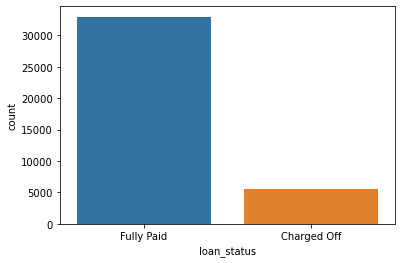

In [36]:
# checking Loan_status count
sns.countplot(x=df['loan_status'], data=df)

Statistic for the above bar plot of 'loan_status'

In [37]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Analysising different ascept of the loan 'loan_amt' , 'rate_of_interest', 'term' --> furture to plot 

In [38]:
df['loan_amnt'].value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64

In [39]:
df['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [40]:
df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [41]:
df['int_rate'].describe()

count     38577
unique      370
top       10.99
freq        913
Name: int_rate, dtype: object

Lets plot the 'init_rate' to see th spread of load over the interest rate

In [42]:
# covert the int_rate to numeric value we have already removed the %
df['int_rate'] = pd.to_numeric(df['int_rate'])
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:>

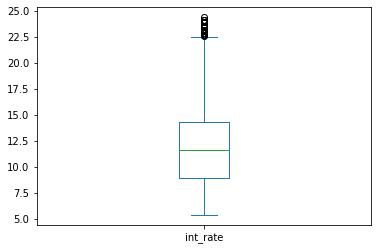

In [43]:
#plot the values
df['int_rate'].plot.box()

we can see some outlier values in int_rate column which needs to analysed 

Other Column analysis


In [44]:
#grade 
df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [45]:
#sub_grade
df['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [46]:
#emp_length unique
df['emp_length'].unique()

array([10. ,  0.5,  3. ,  8. ,  9. ,  4. ,  5. ,  1. ,  6. ,  2. ,  7. ,
        nan])

In [47]:
#home_owner
df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [48]:
#verification_status
df['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [49]:
#purpose
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [50]:
#title
df['title'].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  int64  
 4   int_rate                 38577 non-null  float64
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  float64
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  loan_status              38577 non-null  object 
 13  purpose                  38577 non-null  object 
 14  title                 

<AxesSubplot:>

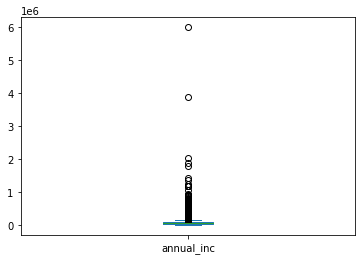

In [52]:
df['annual_inc'].plot.box()

Lots of Outliners
We will remove using quantile
<ul>
   <li> The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.</li>
<li>So, considering threshold for removing outliers as 0.95</li>
</ul>    

In [53]:
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [54]:
per_95_annual_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= per_95_annual_inc]

'annual_inc' is Clean now

<AxesSubplot:xlabel='annual_inc'>

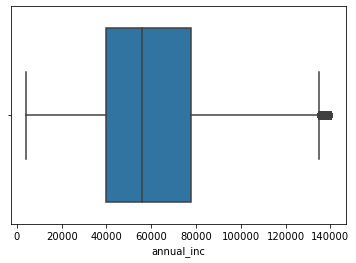

In [55]:
sns.boxplot(df.annual_inc)

Cleaning other columns

<AxesSubplot:xlabel='dti'>

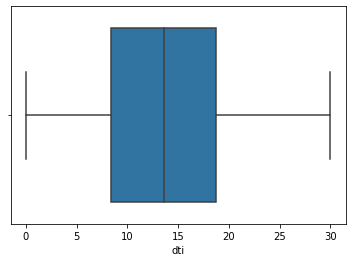

In [56]:
sns.boxplot(df.dti)

Cleaning 'loan_amt'

In [67]:
sns.boxplot(df.quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99]))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1753489401.py, line 1)

The outliner using quantile for --> 0.75 to 1.0

In [66]:
df.loan_amnt.quantile([ 0.5,0.75,0.90, 0.95, 0.97,0.98, 0.99,1.0])

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

In [ ]:
sns.boxplot(df.funded_amnt_inv)

In [65]:
df.funded_amnt_inv.quantile([ 0.5,0.75,0.90, 0.95, 0.97,0.98, 0.99,1.0])

0.50     8375.000000
0.75    13623.731415
0.90    19750.000000
0.95    23941.875589
0.97    24975.000000
0.98    27950.000000
0.99    31954.028576
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64

In [70]:
df.funded_amnt.quantile([ 0.5,0.75,0.90, 0.95, 0.97,0.98, 0.99,1.0])

0.50     9000.0
0.75    14400.0
0.90    20000.0
0.95    25000.0
0.97    25000.0
0.98    28100.0
0.99    34000.0
1.00    35000.0
Name: funded_amnt, dtype: float64

The value distribution for 'funded_amnt_inv', 'funded_amnt' and 'loan_amnt' are similar.
Lets plot the Distribution plot to get more clear picture

Text(0.5, 0, 'Fund Amount Inv')

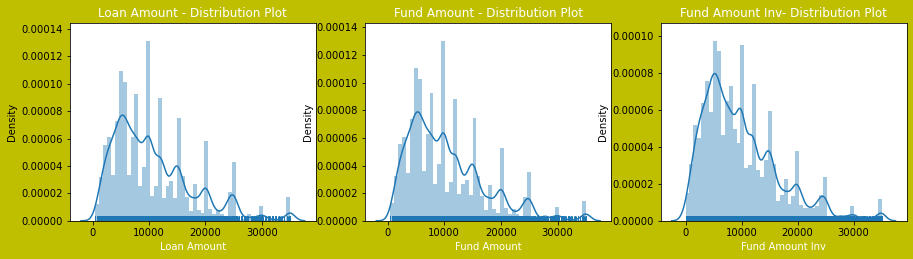

In [58]:
plt.figure(figsize=(15,8), facecolor='y')
plt.subplot(2, 3, 1)
loan_x = sns.distplot(df['loan_amnt'],rug = True)
loan_x.set_title('Loan Amount - Distribution Plot',color='w')
loan_x.set_xlabel('Loan Amount',color='w')

plt.subplot(2, 3, 2)
loan_x = sns.distplot(df['funded_amnt'],rug = True)
loan_x.set_title('Fund Amount - Distribution Plot',color='w')
loan_x.set_xlabel('Fund Amount',color='w')

plt.subplot(2, 3, 3)
loan_x = sns.distplot(df['funded_amnt_inv'],rug = True)
loan_x.set_title('Fund Amount Inv- Distribution Plot',color='w')
loan_x.set_xlabel('Fund Amount Inv',color='w')


<h4>Observation</h4>
1. From pervious boxplot and quantile distribution with the above Distribution plot we can conclude that the values are almost similar
2. So from here on we will use 'loan_amnt' for analysis

<h2> Univariant</h2>

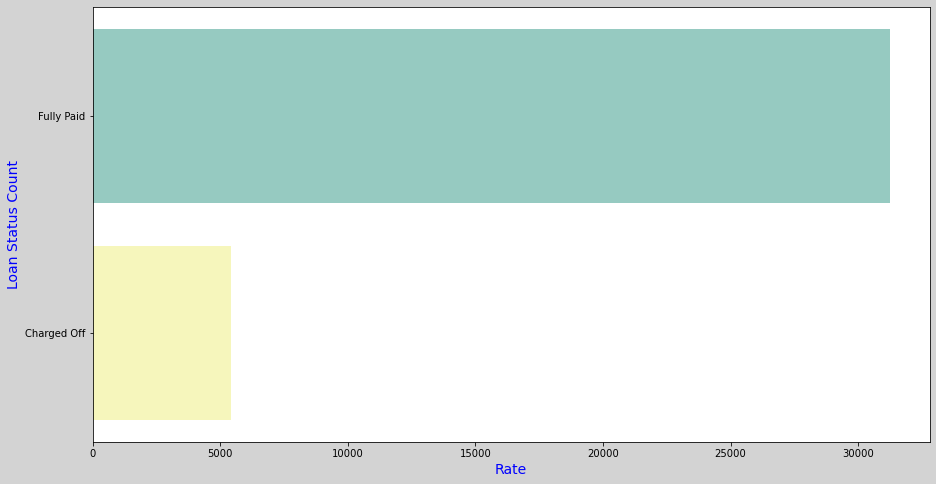

In [94]:
#plotting the loan_status with it attribute to analysis other value which influence the defaulter
plt.figure(figsize=(15,8), facecolor='lightgrey')
purpose_x = sns.countplot(y="loan_status",data= df,palette="Set3")

purpose_x.set_ylabel('Loan Status Count',fontsize=14,color = 'b')
purpose_x.set_xlabel('Rate',fontsize=14,color = 'b')      
plt.show()

<h4> Analysing</h4>
will analysis the 'int_rate' and 'annual_inc' -->  with boxplot and Distribution plot


Text(0.5, 0, 'Interested Rate')

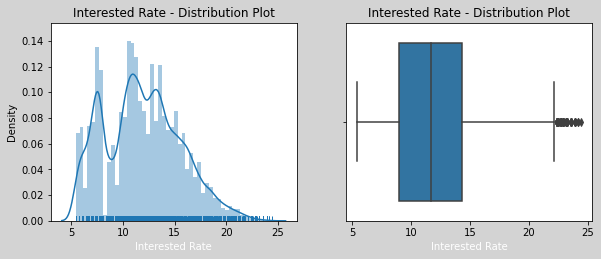

In [97]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
plt.subplot(2, 3, 1)
loan_x = sns.distplot(df['int_rate'],rug = True)
loan_x.set_title('Interested Rate - Distribution Plot')
loan_x.set_xlabel('Interested Rate',color='w')

plt.subplot(2, 3, 2)
loan_x = sns.boxplot(df['int_rate'])
loan_x.set_title('Interested Rate - Distribution Plot')
loan_x.set_xlabel('Interested Rate',color='w')

#Here the maximum distribution of 'init_rate' is in the range 10% - 18%

Text(0.5, 0, 'Annual Increment')

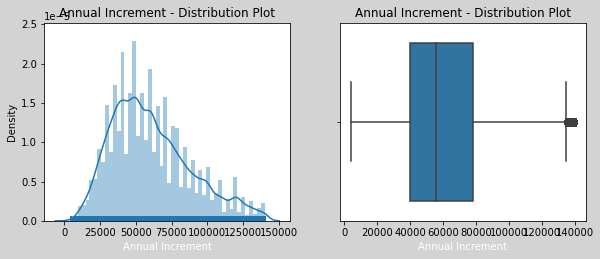

In [98]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
plt.subplot(2, 3, 1)
loan_x = sns.distplot(df['annual_inc'],rug = True)
loan_x.set_title('Annual Increment - Distribution Plot')
loan_x.set_xlabel('Annual Increment',color='w')

plt.subplot(2, 3, 2)
loan_x = sns.boxplot(df['annual_inc'])
loan_x.set_title('Annual Increment - Distribution Plot')
loan_x.set_xlabel('Annual Increment',color='w')

#Here the maximum distribution of 'annual_inc' is in the range 25000 - 750000

<h4> Analysis different parameter influencing the chance of defaulter</h4>
Analysis the purpose of the loan taken by the individual like house loan, medical etc

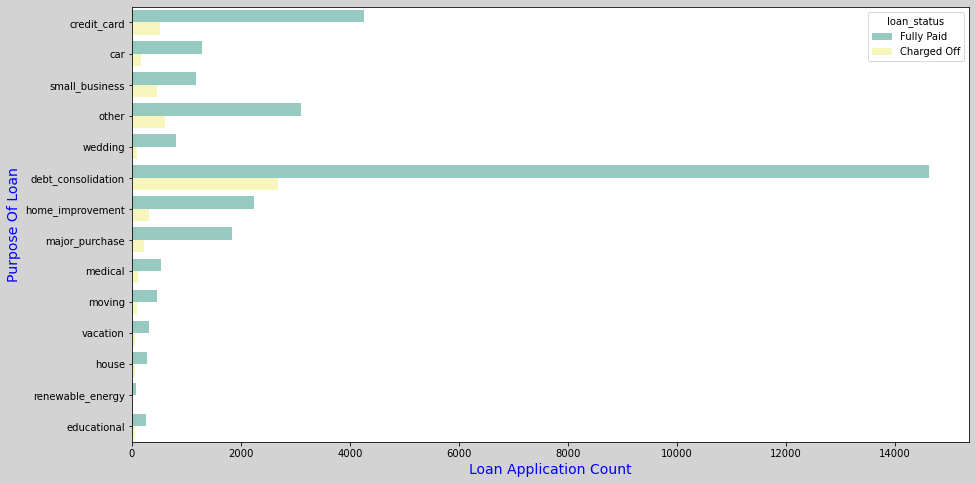

In [101]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
purpose_x = sns.countplot(y="purpose",data= df, hue = 'loan_status', palette="Set3")

purpose_x.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
purpose_x.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

<h4> Observation</h4>
Most of the loan is taken for debt_consolidation and we have already deleted 'loan_status' with attribute "Current" as it plays no role to analysis the defaulters

How is 'loan_amt' to 'income' an influence on defaulter

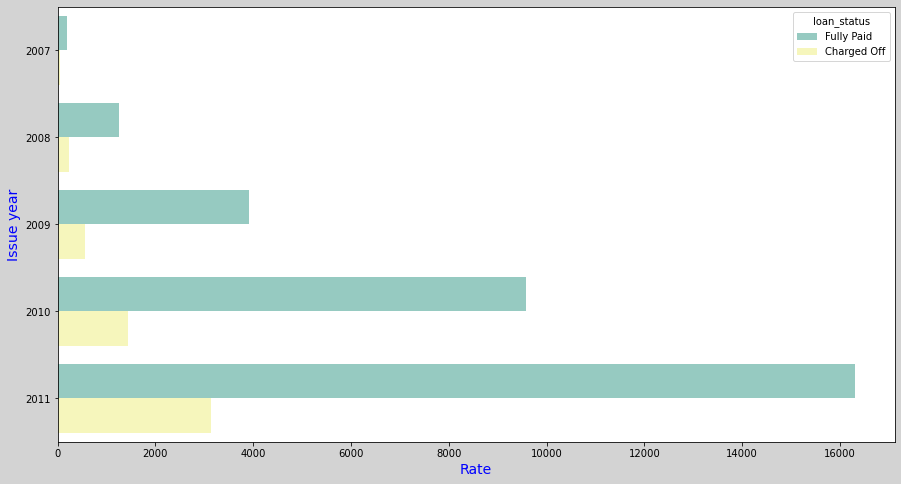

In [112]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="issue_d_year",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Issue year',fontsize=14,color = 'b')
issueplt.set_xlabel('Rate',fontsize=14,color = 'b')      
plt.show()

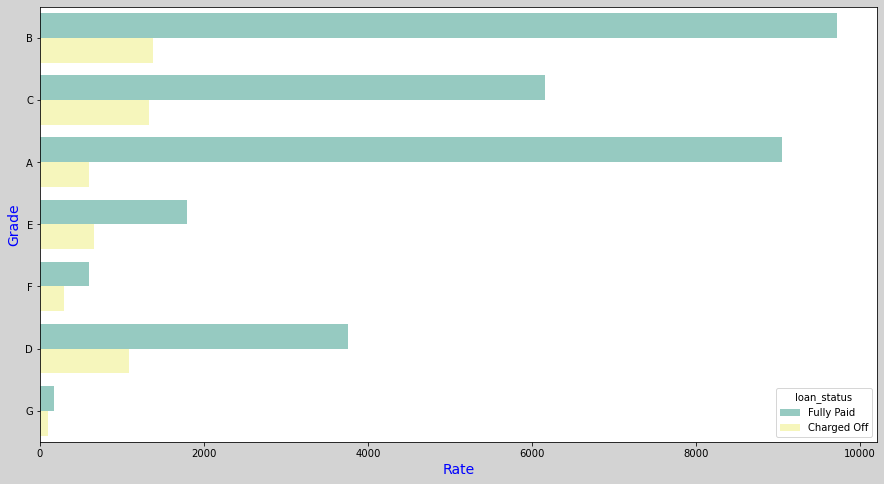

In [111]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="grade",data= df,hue='loan_status',palette = "Set3")

issueplt.set_ylabel('Grade',fontsize=14,color = 'b')
issueplt.set_xlabel('Rate',fontsize=14,color = 'b')      
plt.show()

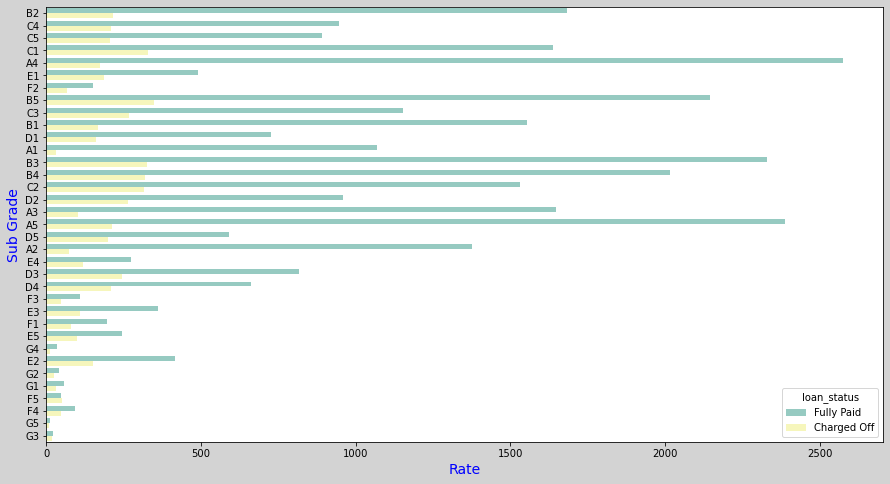

In [110]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="sub_grade",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Sub Grade',fontsize=14,color = 'b')
issueplt.set_xlabel('Rate',fontsize=14,color = 'b')      
plt.show()

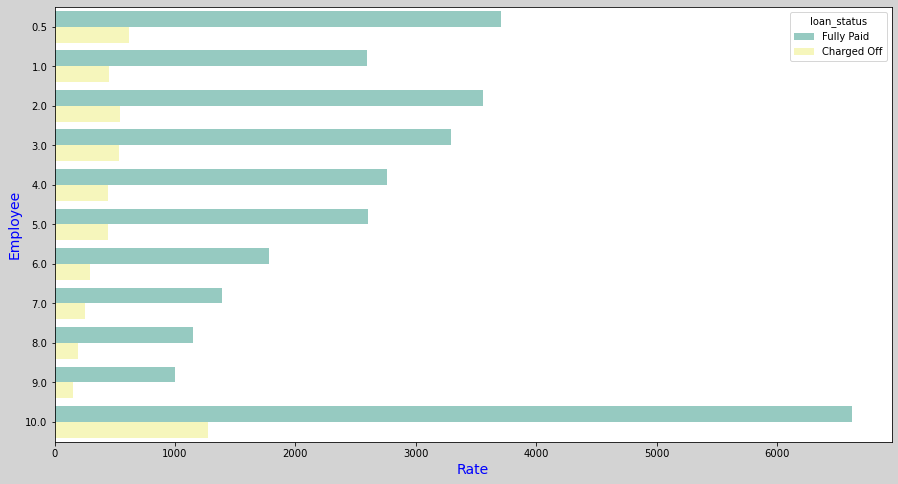

In [109]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="emp_length",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Employee',fontsize=14,color = 'b')
issueplt.set_xlabel('Rate',fontsize=14,color = 'b')      
plt.show()

Lets Analyse the home_ownership attribute with the loan_status to analysis the value of what type of home_ownership leads to defaulters

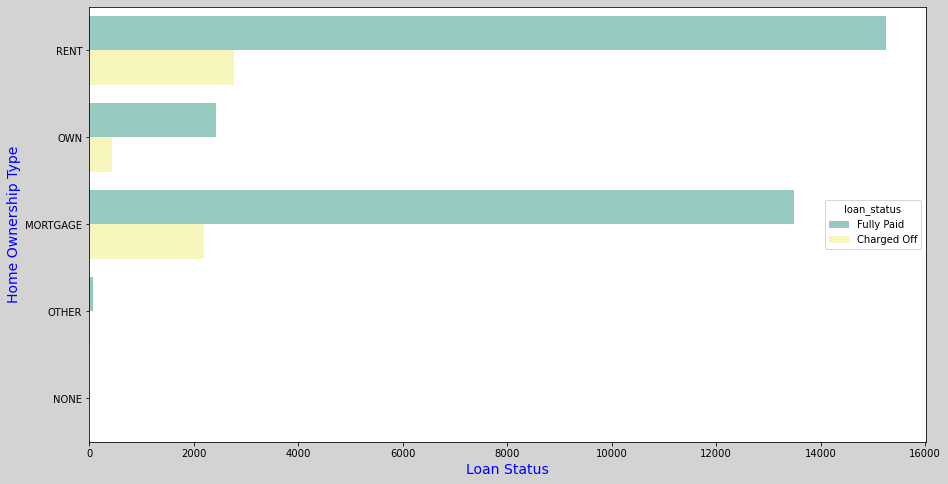

In [108]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="home_ownership",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Home Ownership Type',fontsize=14,color = 'b')
issueplt.set_xlabel('Loan Status',fontsize=14,color = 'b')      
plt.show()

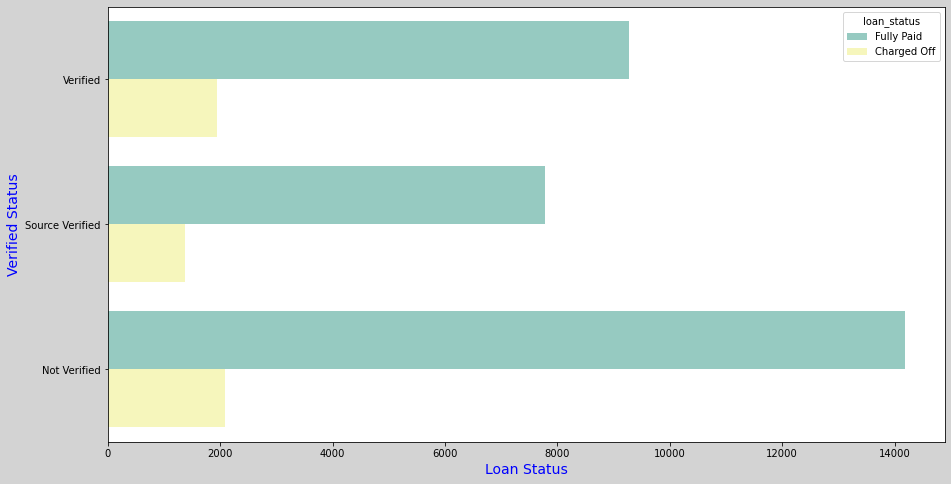

In [113]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="verification_status",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Verified Status',fontsize=14,color = 'b')
issueplt.set_xlabel('Loan Status',fontsize=14,color = 'b')      
plt.show()

The Charged Off value for the Loan-status is marginally same.So could not Analyse much out off it.

We have observed that 2011 is the highest loan raiser, let see for Month.

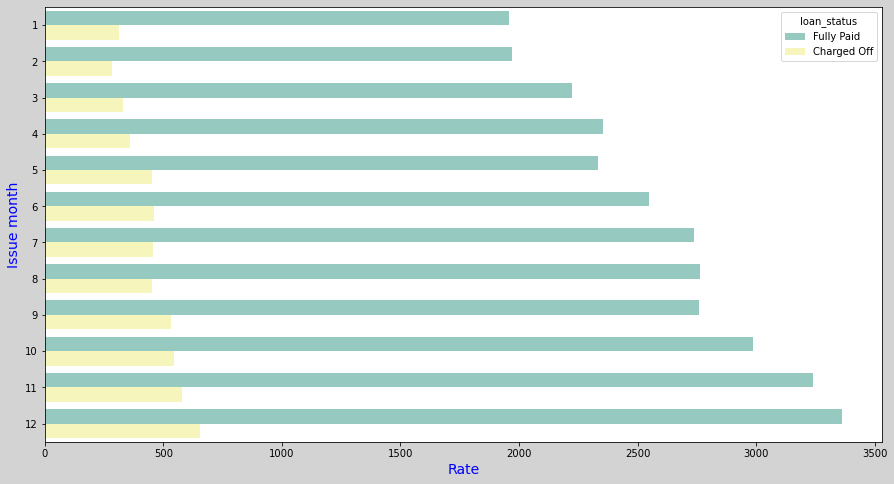

In [115]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="issue_d_month",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Issue month',fontsize=14,color = 'b')
issueplt.set_xlabel('Rate',fontsize=14,color = 'b')      
plt.show()

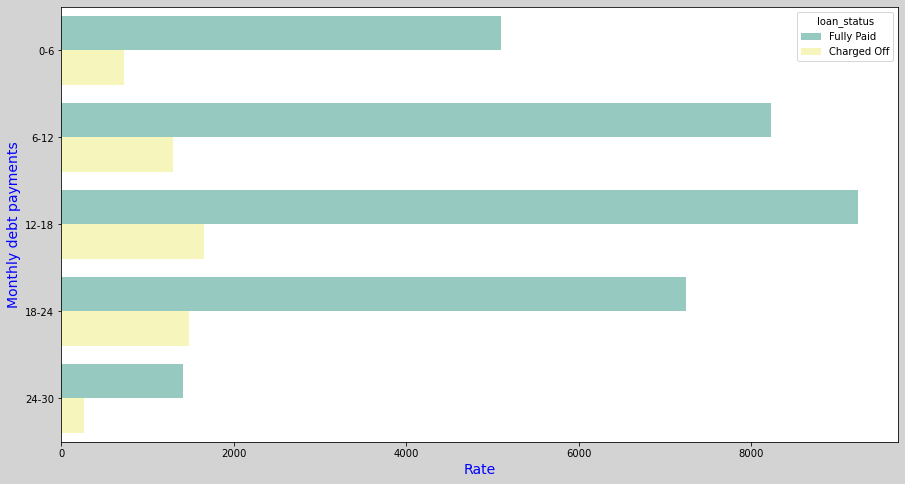

In [121]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
df['dtig'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
issueplt = sns.countplot(y="dtig",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Monthly debt payments',fontsize=14,color = 'b')
issueplt.set_xlabel('Loan Status',fontsize=14,color = 'b')      
plt.show()

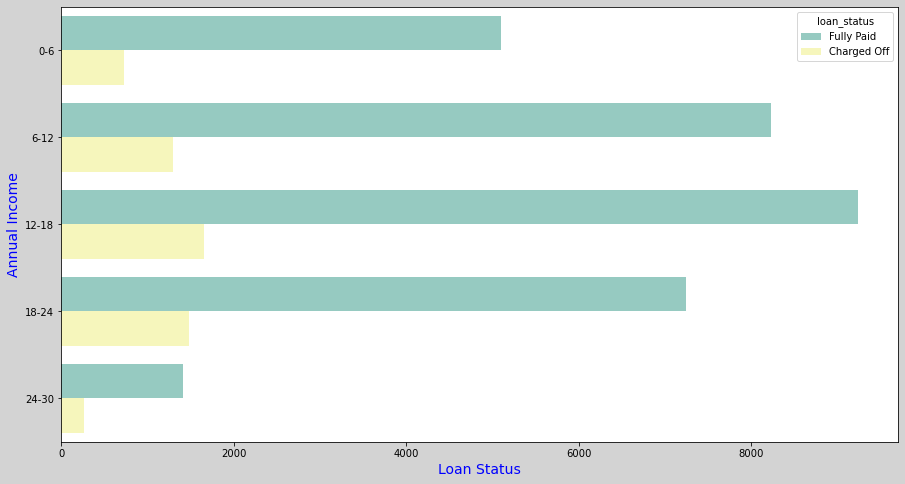

In [122]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
df['annualincg'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels=['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
issueplt = sns.countplot(y="dtig",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Annual Income',fontsize=14,color = 'b')
issueplt.set_xlabel('Loan Status',fontsize=14,color = 'b')      
plt.show()

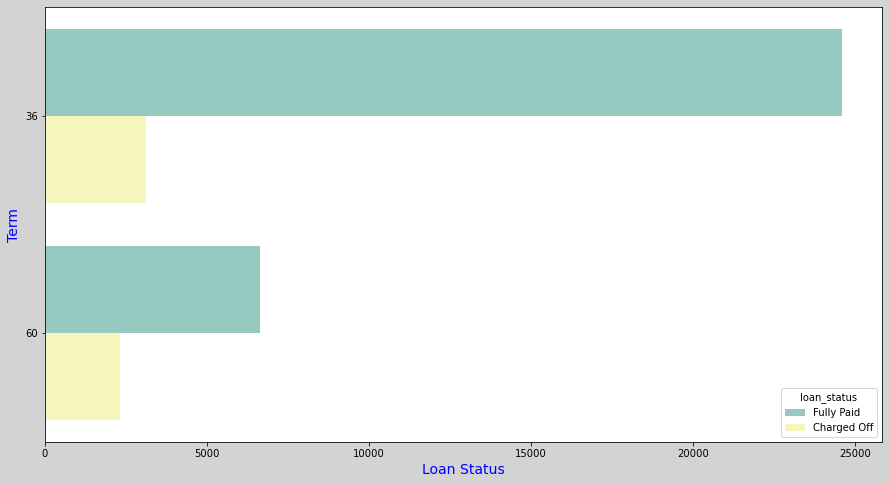

In [123]:
plt.figure(figsize=(15,8), facecolor='lightgrey')
issueplt = sns.countplot(y="term",data= df,hue='loan_status',palette="Set3")

issueplt.set_ylabel('Term',fontsize=14,color = 'b')
issueplt.set_xlabel('Loan Status',fontsize=14,color = 'b')      
plt.show()

<h2> Bivariant Analysis</h2>

We will  Analyse 2 column value together to get the conclusion on defaulters

1. Analysing annula income for loan taker to the loan amount ie.'annual_inc' and 'loan_amnt'

In [ ]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()